In [1]:
from citipy import citipy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from config1 import weatherkey
import requests
import time
from datetime import datetime
from scipy.stats import linregress

In [2]:
#loaded a csv of the city_data_df in case kernel restarts 
file_to_load = 'Resources/city_data.csv'
city_data_df = pd.read_csv(file_to_load)
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Busselton,AU,2021-12-05 23:02:11,-33.6500,115.3333,61.05,67,58,17.40
1,1,Kavaratti,IN,2021-12-05 23:04:01,10.5669,72.6420,80.69,72,60,12.48
2,2,Jieshi,CN,2021-12-05 23:04:45,22.8134,115.8257,57.94,61,23,8.63
3,3,Malanje,AO,2021-12-05 23:04:45,-9.5402,16.3410,64.20,96,100,3.11
4,4,Mataura,NZ,2021-12-05 23:04:45,-46.1927,168.8643,54.48,47,92,5.06
...,...,...,...,...,...,...,...,...,...,...
555,555,Orotukan,RU,2021-12-05 23:19:20,62.2667,151.7000,-36.38,97,19,5.28
556,556,Nongstoin,IN,2021-12-05 23:19:20,25.5167,91.2667,57.38,89,100,2.28
557,557,Corumba,BR,2021-12-05 23:19:20,-19.0092,-57.6533,72.46,99,100,4.56
558,558,Mount Isa,AU,2021-12-05 23:19:21,-20.7333,139.5000,78.57,57,100,16.11


In [3]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [5]:
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [6]:
coordinates = list(lat_lngs)

In [ ]:
cities = []
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

In [ ]:

city = 'Boston'
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weatherkey
city_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weatherkey + "&q=" + city
boston_data = requests.get(city_url).json()
boston_data

In [ ]:
lat = boston_data['coord']['lat']
lng = boston_data['coord']['lon']
max_temp = boston_data['main']['temp_max']
humidity = boston_data['main']['humidity']
clouds = boston_data['clouds']['all']
wind = boston_data['wind']['speed']
print(lat,lng,max_temp,humidity,clouds,wind)

In [ ]:
date = boston_data['dt']
datetime.utcfromtimestamp(date)

In [ ]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [ ]:
city_data = []
print("Beginning Data Retrieval     \n-----------------------------")
record_count = 1
set_count = 1

In [ ]:
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

In [9]:
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2021-12-05 23:02:11,-33.6500,115.3333,61.05,67,58,17.40
1,Kavaratti,IN,2021-12-05 23:04:01,10.5669,72.6420,80.69,72,60,12.48
2,Jieshi,CN,2021-12-05 23:04:45,22.8134,115.8257,57.94,61,23,8.63
3,Malanje,AO,2021-12-05 23:04:45,-9.5402,16.3410,64.20,96,100,3.11
4,Mataura,NZ,2021-12-05 23:04:45,-46.1927,168.8643,54.48,47,92,5.06


In [10]:
city_data_df.to_csv('Resources/city_data.csv',index_label='City_ID')

In [15]:
lats = city_data_df['Lat']
longs = city_data_df['Lng']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df["Wind Speed"]

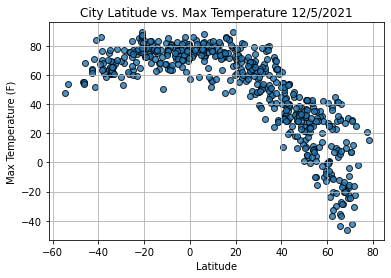

In [94]:
fig,ax = plt.subplots()
ax.scatter(lats,
          max_temps,
          edgecolor = 'black',linewidths = 1,marker='o',
          alpha=0.8,label='Cities')
ax.set_ylabel('Max Temperature (F)')
ax.set_xlabel('Latitude')

ax.set_title('City Latitude vs. Max Temperature 12/5/2021')
plt.grid()
plt.savefig('weather_data/Fig1.png')
plt.show()

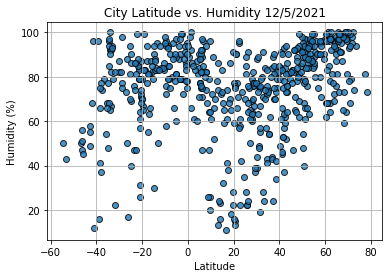

In [19]:
fig,ax = plt.subplots()
ax.scatter(lats,
          humidity,
          edgecolor = 'black',linewidths = 1,marker='o',
          alpha=0.8,label='Cities')
ax.set_ylabel('Humidity (%)')
ax.set_xlabel('Latitude')

ax.set_title('City Latitude vs. Humidity 12/5/2021')
plt.grid()
plt.savefig('weather_data/Fig2.png')
plt.show()

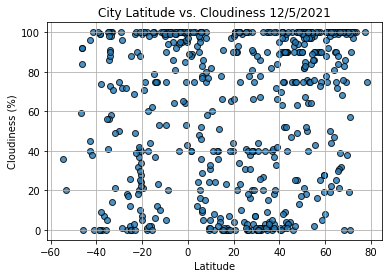

In [24]:
fig,ax = plt.subplots()
ax.scatter(lats,
          cloudiness,
          edgecolor = 'black',linewidths = 1,marker='o',
          alpha=0.8,label='Cities')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness (%)')
ax.set_title('City Latitude vs. Cloudiness 12/5/2021')
plt.grid()
plt.savefig('weather_data/Fig3.png')

plt.show()

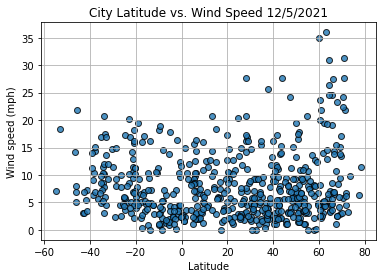

In [128]:
fig,ax = plt.subplots()
ax.scatter(lats,
          wind_speed,
          edgecolor = 'black',linewidths = 1,marker='o',
          alpha=0.8,label='Cities')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind speed (mph)')
ax.set_title('City Latitude vs. Wind Speed 12/5/2021')
plt.grid()
plt.savefig('weather_data/Fig4.png')

plt.show()

In [98]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >=0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat'] <0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kavaratti,IN,2021-12-05 23:04:01,10.5669,72.6420,80.69,72,60,12.48
2,Jieshi,CN,2021-12-05 23:04:45,22.8134,115.8257,57.94,61,23,8.63
5,Baykit,RU,2021-12-05 23:04:45,61.6700,96.3700,-8.07,96,100,3.04
6,Plastun,RU,2021-12-05 23:04:46,44.7561,136.2939,24.93,79,4,5.64
8,Kodiak,US,2021-12-05 23:04:13,57.7900,-152.4072,31.51,80,90,0.00
...,...,...,...,...,...,...,...,...,...
551,Tura,IN,2021-12-05 23:19:18,25.5198,90.2201,66.34,81,100,2.53
554,Borogontsy,RU,2021-12-05 23:19:19,62.6683,131.1683,-11.24,97,100,4.43
555,Orotukan,RU,2021-12-05 23:19:20,62.2667,151.7000,-36.38,97,19,5.28
556,Nongstoin,IN,2021-12-05 23:19:20,25.5167,91.2667,57.38,89,100,2.28


In [101]:
def north_hemi_linregress(north_hemi_y, title, text_coordinates):
    x_values = northern_hemi_df['Lat']
    y_values = northern_hemi_df[north_hemi_y]
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y ={round(slope,2)}x + {round(intercept,2)}"
    
    fig,ax = plt.subplots()
    ax.scatter(x_values,y_values,
               edgecolor = 'black',
               linewidths = 1.0,
               marker='o',
               alpha=0.8)
    ax.plot(x_values,regress_values,"r")

    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel(north_hemi_y)
    plt.show()

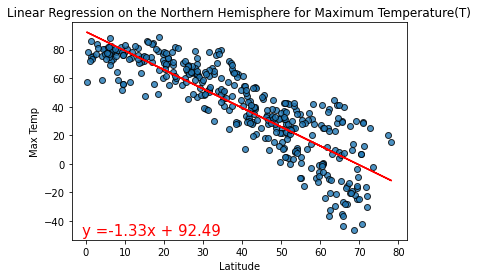

In [110]:
north_hemi_linregress('Max Temp',
                     'Linear Regression on the Northern Hemisphere for Maximum Temperature(T)',
                     (-1,-50))

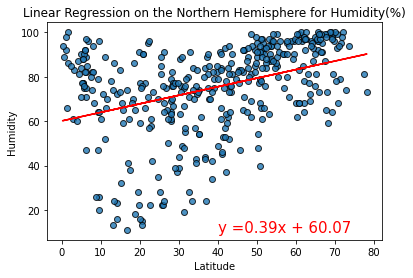

In [113]:
north_hemi_linregress('Humidity',
                     'Linear Regression on the Northern Hemisphere for Humidity(%)',
                     (40,10))

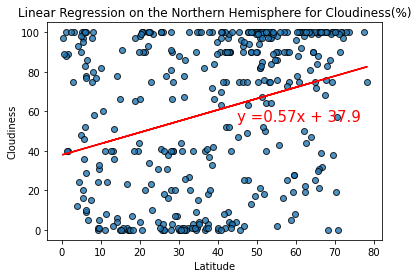

In [120]:
north_hemi_linregress('Cloudiness',
                     'Linear Regression on the Northern Hemisphere for Cloudiness(%)',
                     (45,55))

In [121]:
def south_hemi_linregress(south_hemi_y, title, text_coordinates):
    x_values = southern_hemi_df['Lat']
    y_values = southern_hemi_df[south_hemi_y]
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y ={round(slope,2)}x + {round(intercept,2)}"
    
    fig,ax = plt.subplots()
    ax.scatter(x_values,y_values,
               edgecolor = 'black',
               linewidths = 1.0,
               marker='o',
               alpha=0.8)
    ax.plot(x_values,regress_values,"r")

    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel(south_hemi_y)
    plt.show()

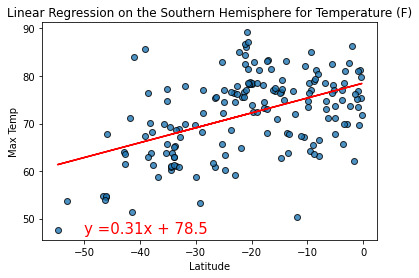

In [127]:
south_hemi_linregress('Max Temp',
                     'Linear Regression on the Southern Hemisphere for Temperature (F)',
                     (-50,47))